# 📊 Model Evaluation & Comparison Notebook
Evaluate Logistic Regression, Random Forest, and XGBoost models on phishing data.

## 🔹 Step 1: Load Dataset and Split into Train/Test

In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Load and preprocess data
#df = pd.read_csv("/workspaces/phishing-flask-api/data/phishing.csv")
df = pd.read_csv("../data/phishing.csv")
X = df.drop("Result", axis=1)
y = df["Result"].map({-1: 0, 1: 1})  # Convert labels to binary (0 = legitimate, 1 = phishing)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 🔹 Step 2: Train Models

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(random_state=42)
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Train models
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)


/home/vscode/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:00:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## 🔹 Step 3: Evaluate and Compare Models

In [16]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1 Score": f1_score(y, y_pred),
        "ROC-AUC": roc_auc_score(y, y_proba)
    }

# Evaluate all models
results = {
    "Logistic Regression": evaluate_model(model_lr, X_test, y_test),
    "Random Forest": evaluate_model(model_rf, X_test, y_test),
    "XGBoost": evaluate_model(model_xgb, X_test, y_test)
}

# Display results
results_df = pd.DataFrame(results).T.round(3)
display(results_df)


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.922,0.931,0.932,0.931,0.978
Random Forest,0.967,0.961,0.982,0.971,0.995
XGBoost,0.970,0.965,0.983,0.974,0.996


## 🧩 Confusion Matrices

Each confusion matrix below shows how well the model distinguishes between **phishing** and **legitimate** websites.

### Matrix Layout

|                | Predicted: Legitimate (0) | Predicted: Phishing (1) |
|----------------|----------------------------|---------------------------|
| **Actual: Legitimate (0)** | True Negative (TN)          | False Positive (FP)         |
| **Actual: Phishing (1)**   | False Negative (FN)         | True Positive (TP)          |

- **True Positive (TP)**: Correctly detected phishing attempt  
- **True Negative (TN)**: Correctly classified legitimate site  
- **False Positive (FP)**: Legitimate site wrongly flagged as phishing (False Alarm)  
- **False Negative (FN)**: Missed phishing site (Dangerous!)

### Why It Matters
- In cybersecurity, **False Negatives (FN)** are the most critical — they represent phishing attacks that were missed.
- **False Positives (FP)** can cause user disruption but are less risky.

Each confusion matrix below helps visually assess how each model performs in these categories.


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# XGBoost
from xgboost import XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

/home/vscode/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:05:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


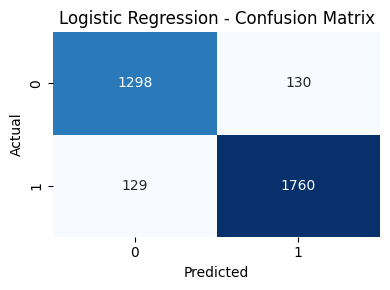

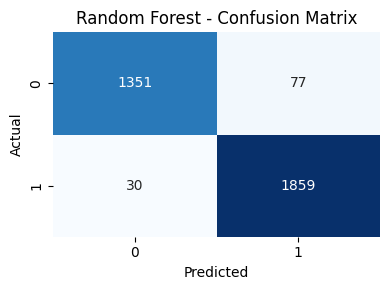

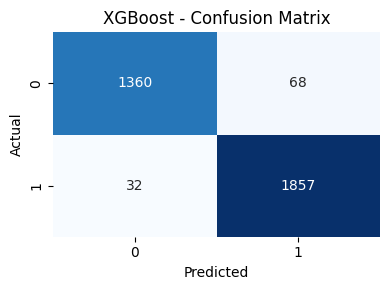

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
